# Netflix Stock Analysis: K-Means and Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('figure', figsize=(15, 10))

In [2]:
df = pd.read_csv("NFLX.csv")

open = open price per stock

high = highest price for the day

low = lowest price for the day 

close = closing price per stock 

adj close = Adjusted close price adjusted for splits and dividend and/or capital gain distributions

volume = total volume of stocks 

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/18,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/18,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/18,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/18,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/18,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.shape

(1009, 7)

# Data Visualization

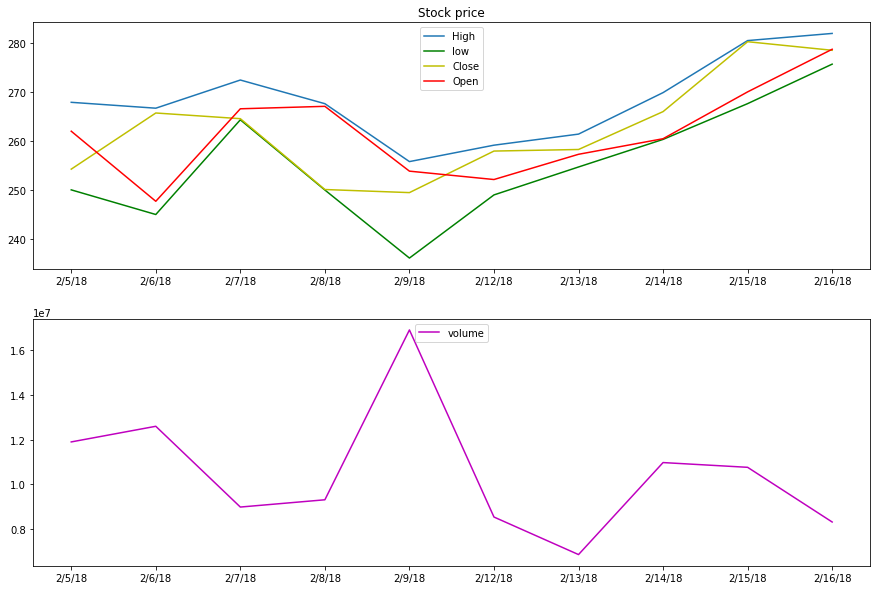

In [5]:

#graph open, high, low, close with the total volume of stock generated for that day to get a look at how the 
#fluctuations in price affect the total volume of stocks were traded for that day


figure, axis = plt.subplots(2,1)

axis[0].plot(df["Date"][0:10],df["High"][0:10], label = 'High')
axis[0].set_title("Stock price")

axis[0].plot(df["Date"][0:10], df["Low"][0:10], color = 'g', label = "low")

axis[0].plot(df["Date"][0:10],df["Close"][0:10], color = 'y', label = 'Close')

axis[1].plot(df["Date"][0:10],df["Volume"][0:10], color = 'm', label = "volume")

axis[0].plot(df["Date"][0:10], df["Open"][0:10], color = 'r', label = "Open")


axis[0].legend(loc = 'upper center')
axis[1].legend(loc='upper center')

Text(0.5, 1.0, 'Stock Volume')

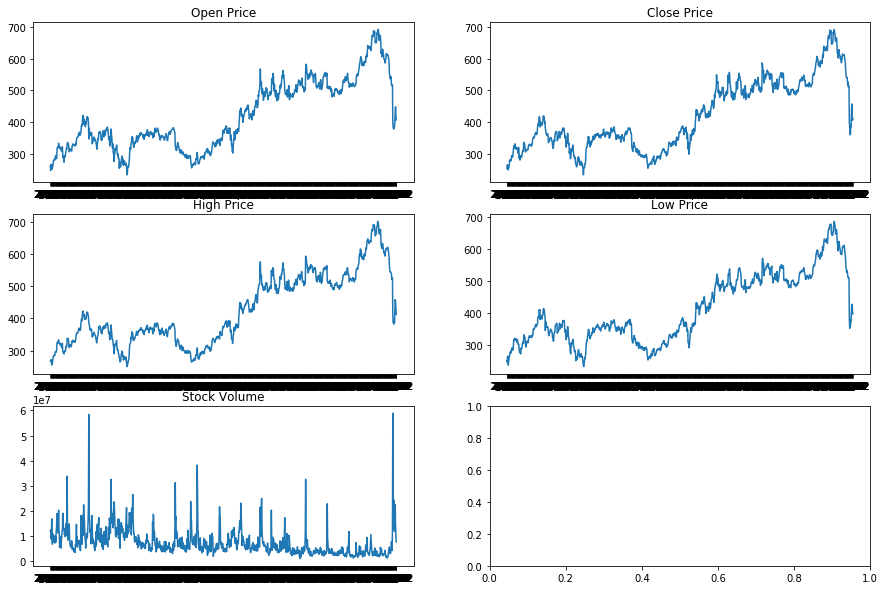

In [6]:
# graph the entirity of the data to see the different patterns for each of the values we are trying to analyze

figs, axs = plt.subplots(3,2)

axs[0,0].plot(df["Date"], df["Open"])
axs[0,0].set_title("Open Price")

axs[0,1].plot(df["Date"], df["Close"])
axs[0,1].set_title("Close Price")

axs[1,0].plot(df["Date"], df["High"])
axs[1,0].set_title("High Price")

axs[1,1].plot(df["Date"], df["Low"])
axs[1,1].set_title("Low Price")

axs[2,0].plot(df["Date"], df["Volume"])
axs[2,0].set_title("Stock Volume")

Text(0.5, 1.0, 'Stock Volume Moved')

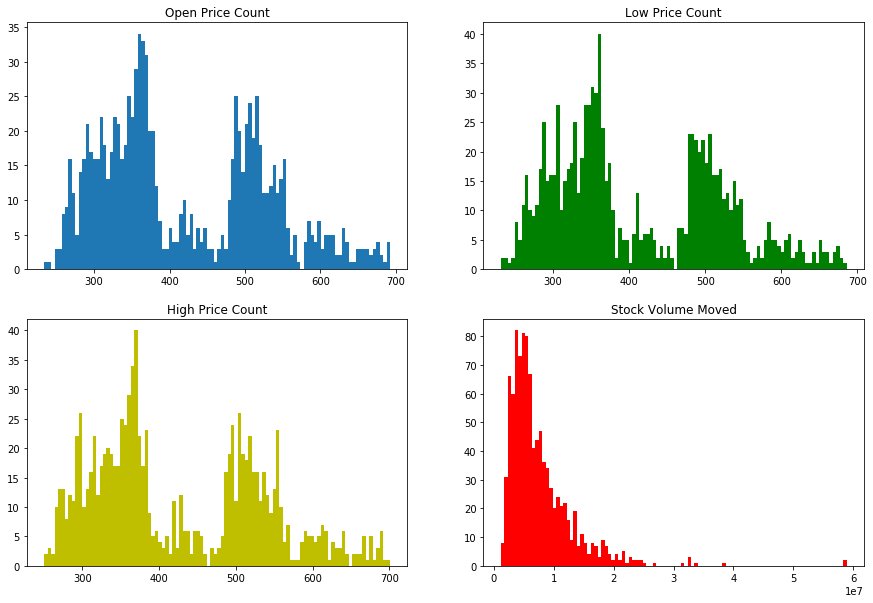

In [7]:
# plot histograms for each of the data to see if there are any averages 


fig, ax = plt.subplots(2,2)
ax[0,0].hist(df["Open"], bins = 100)
ax[0,0].set_title("Open Price Count")

ax[0,1].hist(df["Low"], bins = 100, color = 'g')
ax[0,1].set_title("Low Price Count")

ax[1,0].hist(df["High"], bins = 100, color = 'y')
ax[1,0].set_title("High Price Count")

ax[1,1].hist(df["Volume"], bins = 100, color = 'r')
ax[1,1].set_title("Stock Volume Moved")

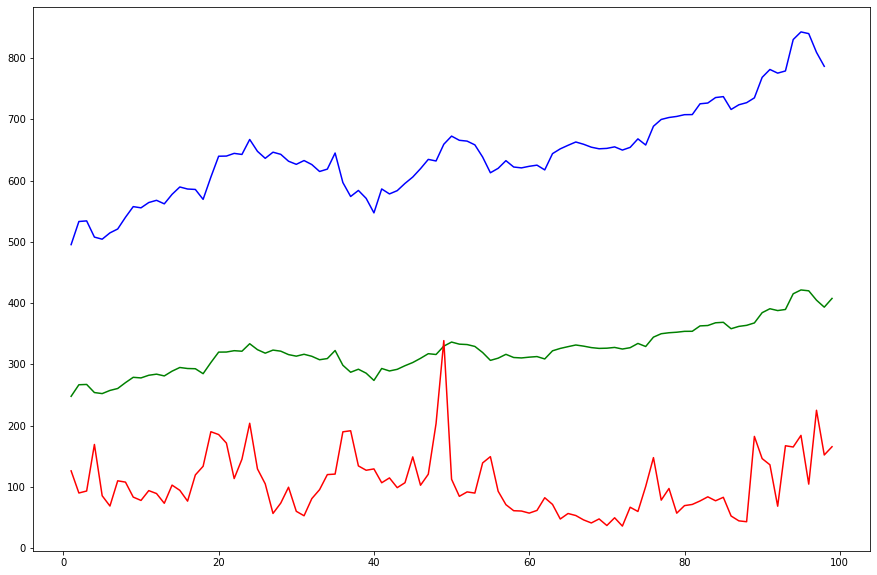

In [8]:
plt.plot(df["Open"][1:100], color = 'g', label = 'Opening Price')
plt.plot((df["Open"][1:100] - df["Open"][0:99] * -1), color = 'b', label = 'Price Variance')
plt.plot(df["Volume"][1:100]/100000, color = 'r', label = 'Volume') #scale down to see the correlation to opening prices 

Text(0.5, 1.0, 'Opening Price Vs Volume')

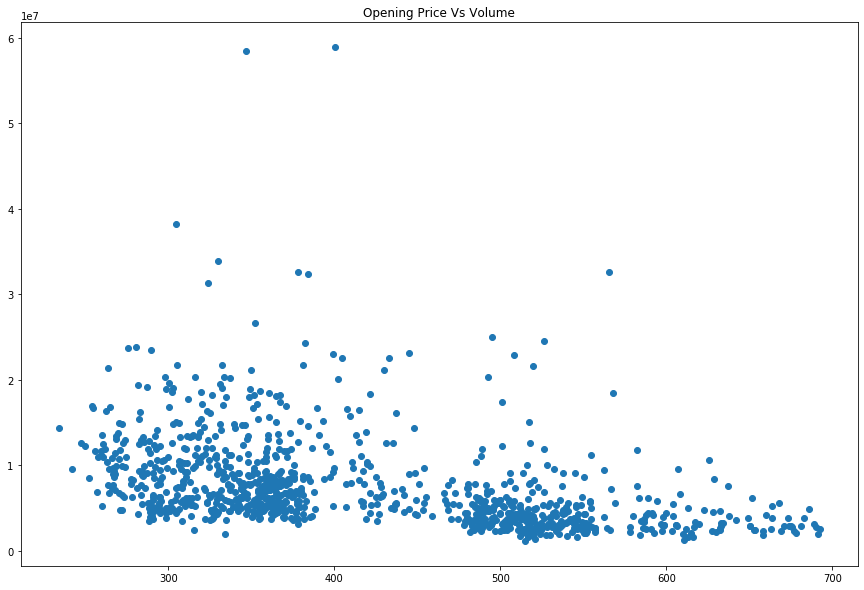

In [9]:
plt.scatter(df["Open"], df["Volume"])
plt.title("Opening Price Vs Volume")

Text(0.5, 1.0, 'Opening Stock Prices in US dollars')

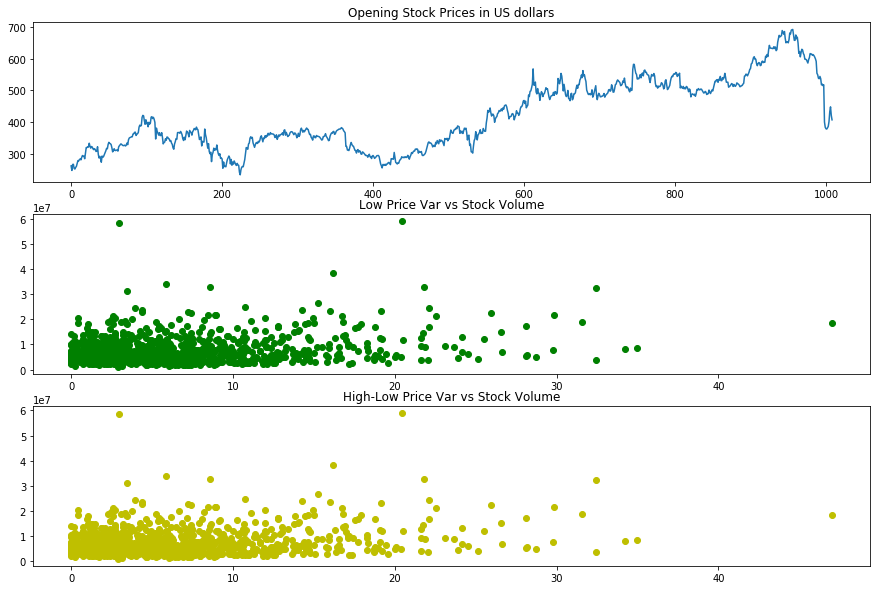

In [10]:


fig, ax = plt.subplots(3,1)
ax[2].scatter((df["Open"] - df["Low"]), df["Volume"], color = 'y')
ax[2].set_title("High-Low Price Var vs Stock Volume")
ax[1].scatter((df["Open"] - df["Low"]), df["Volume"], color = 'g')
ax[1].set_title("Low Price Var vs Stock Volume")
ax[0].plot(df["Open"])
ax[0].set_title("Opening Stock Prices in US dollars")

Complete a K-Means algorith to determine any patterns between opening price and stock volume moved

Complete a linear regression model to try and predict volume based on opening price?


# Analysis

### K-Means Analysis

In [11]:
%matplotlib inline
import math

In [12]:
# function to plot the final coded graphs with the K-means centers
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)
    
    matplotlib.rc('figure', figsize=(15, 10))
    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [13]:
def calcSqDistances(X, Kmus):
    sqDmat = []
    for mean in Kmus:
        norm_array = []
        for point in X:
            norm_array.append(np.linalg.norm(point - mean))
        sqDmat.append(norm_array)
    return np.array(sqDmat).T

In [14]:
def determineRnk(sqDmat):
    mean_rank = []
    for i in sqDmat:
        cluster_val = []
        for j in i: 
            closest = i.min()
            if j == closest:
                cluster_val.append(1)
            else: 
                cluster_val.append(0)
        mean_rank.append(cluster_val)
    return np.array(mean_rank)

In [15]:
def recalcMus(X, Rnk):
    # Fill this
    N = np.shape(X)[0]#13569
    k = np.shape(Rnk)[1] #2
    
    
    Kmus = np.empty(shape=(k,np.shape(X)[1]),dtype='object')
    
    for i in range(k):#0-1
        cluster_sum = np.zeros(np.shape(X)[1])
        count = 0
        
        for j in range(N): #from 0-13568
            cluster_sum = cluster_sum + Rnk[j][i]*X[j]
            count += Rnk[j][i]
            
        Kmus[i] = cluster_sum/count ##gives the actual means
        
    #print (cluster_sum)
    #print(count)
    return Kmus

In [16]:
def wcss(Kmus, K, X, Rnk):
    sum_ = 0
    sum_k = 0
    for k in range(K):
        sum_ += sum_k
        sum_k = np.zeros(np.shape(X)[1])
        count_k = 0
        for j in range(np.shape(X)[0]):#loop through
            if(Rnk[j][k] == 1): #since the indices in Rnk correspond to the value in X take the k value of the jth rank
                sum_k = sum_k + (X[j] - Kmus[k])**2 #take the value at index j subtract by the corresponding mu
                count_k += 1
            else: 
                continue
        
        sum_k = (np.sum(sum_k))
        
    return sum_

In [17]:
def runKMeans(K, csv_filepath):
    # Load cleaned data in
    df = pd.read_csv(csv_filepath)
    
    # drop non numerical values in order to run K-means and convert into a numpy array
    x1 = np.array(df["Open"].astype(int))
    x2 = np.array(df["Volume"].astype(int))
    data = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
    data = pd.DataFrame(data)
    
    X = data#.drop(['Unnamed: 0', 'Brand', 'Model', 'Added'], axis = 1)
    X = np.array(X)
    
    # Determine and store data set information; N is the number of objects, D is the number of attributes
    N,D = X.shape

    # Allocate space for the Kmu vectors
    Kmus = np.zeros((K, D))
    
    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector 
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N x K matrix with the n,k entry as specfied above
        
        sqDmat = calcSqDistances(X, Kmus);
        
        # given the matrix of squared distances, determine the closest cluster center for each data vector 

        # Rnk is the "responsibility" matrix
        # Rnk will be an N x K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k, and is 0 otherwise
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        # If old cluster means are relatively close to the new cluster means,then break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    #append the ranking of each datapoint to the initial dataframe
    rnk = Rnk.tolist()
    data['Rank'] = rnk
    
    #plotCurrent(X,Rnk,Kmus)
    return Kmus,X,Rnk,data

In [18]:
def wss_plot(Range,csv_filepath):
    # using an inital arbitrary k value, compute the WSS of the data from 2-k and plot each
    WSS_comp = []
    k_val = []
    
    for i in range(2,Range + 1):
        Kmus,X,Rnk,data = runKMeans(i,csv_filepath)
        WSS = wcss(Kmus,i, X, Rnk)
        k_val.append(i)
        WSS_comp.append(WSS)
        
    plt.plot(k_val, WSS_comp, marker='o', linestyle = '-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Within Cluster sum of squares")
    plt.title("Within Cluster for Different K-Means")

#### Complete the WSS for different K's and determine what number of centroids is best for analysis using the elbow method

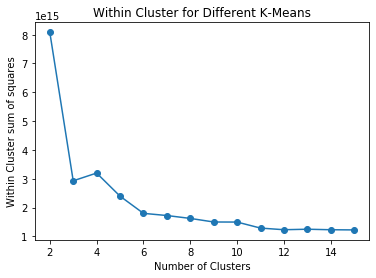

In [19]:
wss_plot(15, "NFLX.csv")

##### Based on the elbow method it seems 6 centers is best for analysis of the data

In [20]:
Kmus,X,Rnk,data = runKMeans(6,"NFLX.csv")

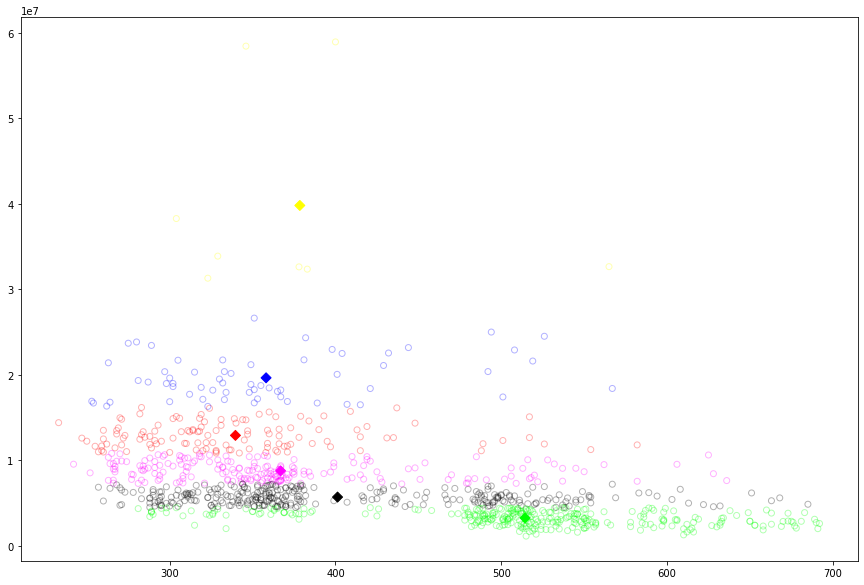

In [21]:
plotCurrent(X,Rnk,Kmus)

From the K-Means graph with the six clusters we can see that the majority of the centers are between 300 and 400. This tells us that most of the stock volume is moved when the opening price is between $300  and  $400.

### Linear Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
def univariateLR(X,Y):
    ## Create A, the augmented data array
    
    A_train, A_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    
    x1 = A_train

    ones = np.ones(len(A_train))
    A_tr = np.vstack([ones, x1]).T
    
    ## Solve for w, the weight vector

    w1 = np.linalg.lstsq(A_tr,Y_train, rcond = None)[0]
    
    Y_train_pred = np.matmul(A_tr,w1)


    A_te = np.vstack([np.ones(len(A_test)), A_test]).T

    Y_test_pred = np.matmul(A_te,w1)

    print("Model 1:")
    print("(Volume) = %f  + %f * (X)" % (w1[0],w1[1]))
    
    #------------------------------------------------------------------------------------------------------------
    ## Create A, the augmented data array

    ones = np.ones(len(A_train))
    squares = np.square(x1)

    Atr = np.vstack([ones, x1, squares]).T

    ## Solve for w, the weight vector
    w2 = np.linalg.lstsq(Atr,Y_train, rcond=None)[0]
    
    Y_train_pred2 = np.matmul(Atr, w2)
    
    A_te = np.vstack([np.ones(len(A_test)), A_test, A_test**2]).T

    Y_test_pred2 = np.matmul(A_te,w2)

    print("Model M2:")
    print("(Volume) = %f  + %f * (X) + %f * (X)^2" % (w2[0],w2[1],w2[2]))
    print("\n")
    
    
    #------------------------------------------------------------------------------------------------------------
    ## Create a smooth set of X values for plotting the model
    lineinput = np.linspace(200,700,100)     #replace with how we want to space out the information and the range
    
    
    ## Send the random X values for plotting through the linear model
    ones = np.ones(len(lineinput))
    squares = np.square(lineinput) # square the random x values for the second degree model
    
    A3 = np.vstack([ones, lineinput]).T
    A4 = np.vstack([ones,lineinput,squares]).T 

    yplot1 = np.matmul(A3, w1) #running the first order model with the random X values
    yplot2 = np.matmul(A4, w2) #running the second order model with the random x values 
    
    #------------------------------------------------------------------------------------------------------------
    ## Plot the data along with the model

    
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

    # First order Model plot
    plt.subplot(1,2,1)
    plt.scatter(X, Y, label = "Data")
    plt.plot(lineinput, yplot1, label = "First Order", color = 'orange')
    plt.ylabel('Volume') # fill in Y
    plt.xlabel('Opening Price') # fill in X
    plt.title('Model 1')
    plt.legend()

    # Second order model plot
    plt.subplot(1,2,2)
    plt.scatter(X, Y, label = "Data")
    plt.plot(lineinput, yplot2, label = "Second Order", color = 'orange')
    plt.ylabel('Volume') # fill in Y
    plt.xlabel('Opening Price') # fill in X
    plt.title('Model 2')
    plt.legend()
    plt.show # This lets you plot multiple inputs on the same graph
    
    #-------------------------------------------------------------------------------------------------------------
    
    # Compute the Sum Squared Error to measure the variation from the original
    model1_SSE_train = sum((Y_train_pred - Y_train)**2)
    model1_SSE_test = sum((Y_test_pred - Y_test)**2)
    
    model2_SSE_train = sum((Y_train_pred2 - Y_train)**2)
    model2_SSE_test = sum((Y_test_pred2 - Y_test)**2)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = ['Train', 'Test']
    y = [model1_SSE_train, model1_SSE_test]
    ax.bar(x,y)
    plt.ylabel('Error')
    plt.title('SSE for First Order')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = ['Train', 'Test']
    y = [model2_SSE_train, model2_SSE_test]
    ax.bar(x,y)
    plt.ylabel('Error')
    plt.title('SSE for Second Order')
    plt.show()
    return w1,w2

Model 1:
(Volume) = 16072113.268467  + -20373.810806 * (X)
Model M2:
(Volume) = 17313590.676017  + -26340.095229 * (X) + 6.718178 * (X)^2




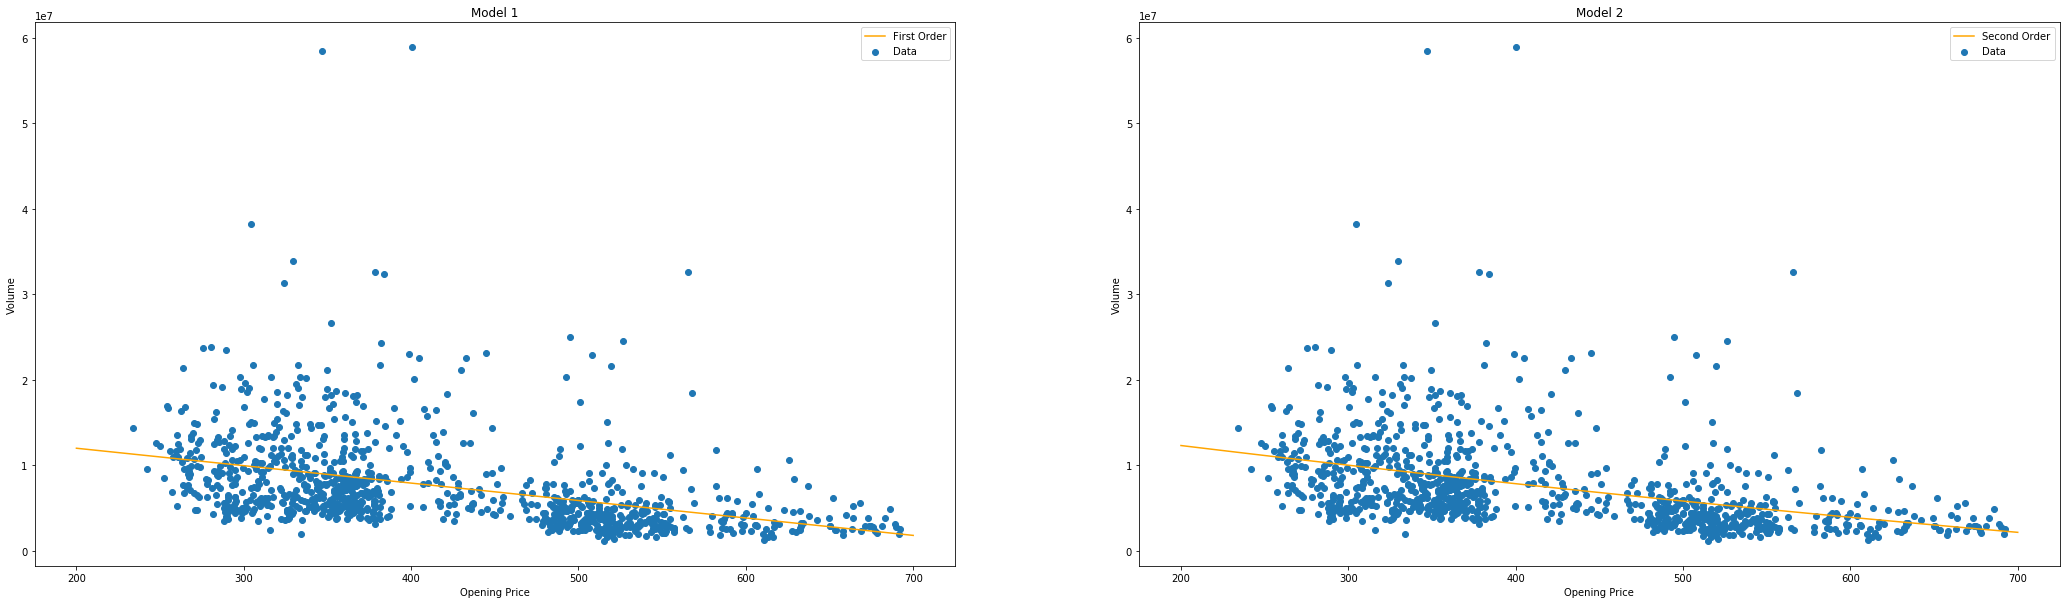

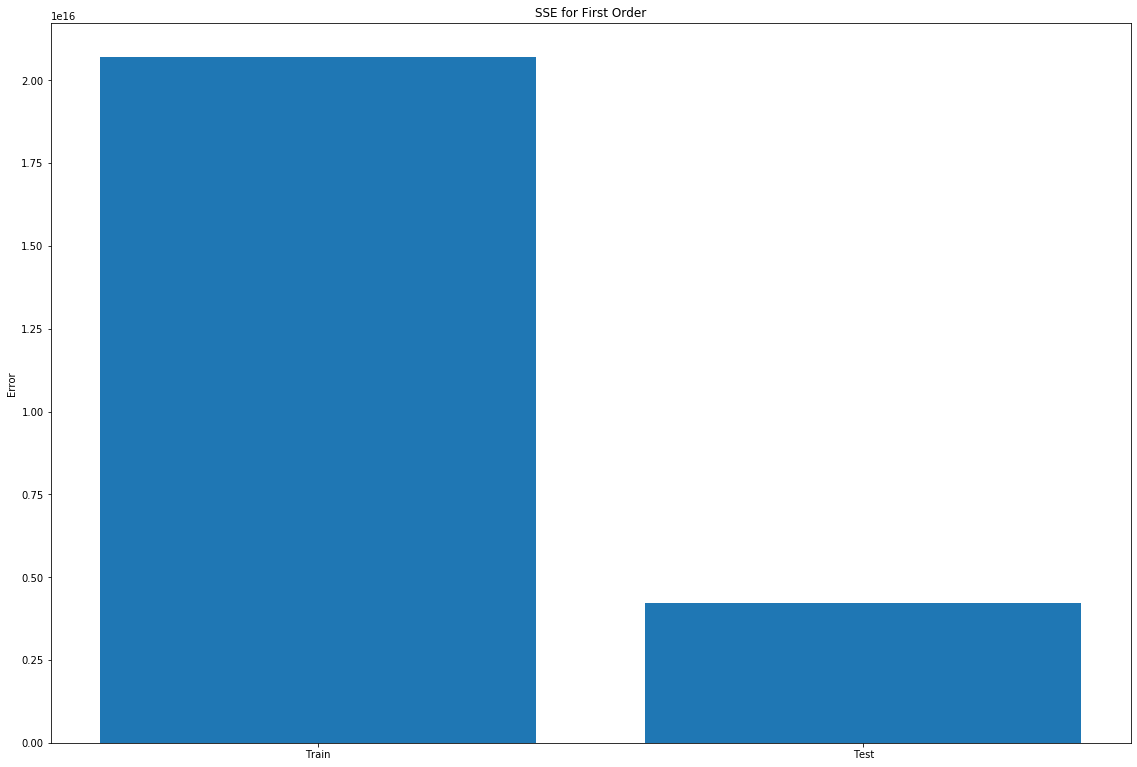

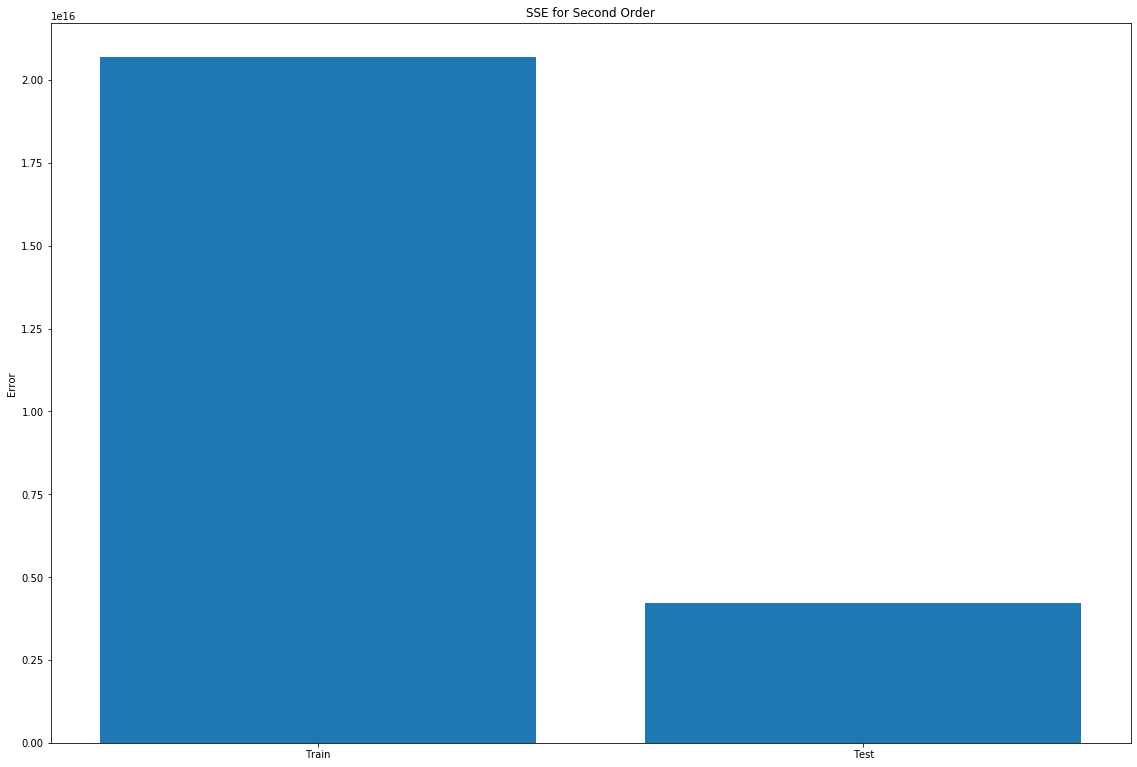

In [24]:
w1,w2 = univariateLR(df["Open"], df["Volume"])

In [25]:
def Reg_Final(X, Y, w1, w2): 
    df_Final = pd.DataFrame({'Open' : []})
    df_Final["Open"] = X
    df_Final["Volume Actual"] = Y
    df_Final["1st Order Volume Predicted"] = w1[0] + (w1[1] * X)
    df_Final["2nd Order Volume Predicted"] = w2[0] + (w2[1] * X) + (w2[2] * (X**2))
    
    df_Final["Variance 1st Order"] = (df_Final["1st Order Volume Predicted"]- df_Final["Volume Actual"]) / df_Final['Volume Actual']
    df_Final["Variance 2nd Order"] = (df_Final["2nd Order Volume Predicted"] - df_Final["Volume Actual"]) / df_Final['Volume Actual']
    # % variance is how much higher or lower the actual volume is from the predicted volume
    #plt.scatter(df_Final["Open"],  df_Final["Volume Actual"])
    
    sum_tot = sum(df_Final["Volume Actual"])
    fst_sum = sum(df_Final["1st Order Volume Predicted"])
    scnd_sum = sum(df_Final["2nd Order Volume Predicted"])
    
    fst_var = (fst_sum - sum_tot)/ sum_tot
    scnd_var = (scnd_sum - sum_tot )/ sum_tot
    print("First order relative change:", fst_var,"\nSecond order relative change:", scnd_var)
    print((sum_tot/1009) * fst_var)
    return df_Final

In [26]:
Reg_Final(df["Open"], df["Volume"], w1,w2 )

First order relative change: -0.004809902584017633 
Second order relative change: -0.004796892098087127
-36414.25751112852


,Open,Volume Actual,1st Order Volume Predicted,2nd Order Volume Predicted,Variance 1st Order,Variance 2nd Order
0,262.000000,11896100,1.073417e+07,1.087365e+07,-0.097673,-0.085948
1,247.699997,12595800,1.102552e+07,1.120134e+07,-0.124667,-0.110708
2,266.579987,8981500,1.064086e+07,1.076927e+07,0.184753,0.199051
3,267.079987,9306700,1.063068e+07,1.075790e+07,0.142261,0.155930
4,253.850006,16906900,1.090022e+07,1.106008e+07,-0.355280,-0.345825
...,...,...,...,...,...,...
1004,401.970001,20047500,7.882453e+06,7.811185e+06,-0.606811,-0.610366
1005,432.959991,22542300,7.251068e+06,7.168735e+06,-0.678335,-0.681987
1006,448.250000,14346000,6.939553e+06,6.856513e+06,-0.516273,-0.522061
1007,421.440002,9905200,7.485774e+06,7.406048e+06,-0.244258,-0.252307


New dataframe that shows the variables that are being worked with and the predicted values from the first and second order linear regression models, along with the variance of the two orders vs the actual volume moved for that datum

The first order an the second order relative change to the original volume moved is relatively similar, only
different by a very small percentage which means the best way to predict this model is using the second order model
since it is closer to the original stock volume moved. 

The stock volume of the data can be determined by 16586006.054945  + -21605.108704 * (X) + 0.805427 * (X)^2, 
where X is the opening stock price give or take 36414 stocks from the predicted stocks due to error. 